## Exploración de datos de Empleos Públicos

### Importación de librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

### Definición de funciones a utilizar

In [2]:
def clean(text,to_find,to_replace): # Recibe un texto, el valor a encontrar (admite regex) y el valor a reemplazar
    if text == '':
        return None
    else:
        try: return text.replace(re.search(f'({to_find})',text).group(0),to_replace).strip()
        except: return text # En caso de no encontrar el valor to_find (regex) devuelve el mismo texto inicial

### Lectura del archivo

In [3]:
path = r'C:\Users\user\Documents\Proyectos\Empleos Públicos\\' # Ruta
file = 'Data_EE_54800_55800.xlsx' # Nombre del archivo
pd.set_option('display.max_columns', None) # Opción para ver todas las columnas
df = pd.read_excel(path+file)

### Exploración de los datos

Se limpia el campo `Tipo vacante` y se agrupa en un nuevo campo `Tipo vacante grupo`

In [4]:
df['Tipo vacante'] = df['Tipo vacante'].apply(clean, args=['T.cnica','Técnica'])
df['Tipo vacante grupo'] = df['Tipo vacante'].apply(clean, args=[' Ley.+',''])
df['Tipo vacante grupo'] = df['Tipo vacante grupo'].apply(clean, args=[' Carrera.+',''])
df.fillna('').groupby('Tipo vacante grupo').size()

Tipo vacante grupo
                      213
Contrata              400
Código del Trabajo     23
Honorarios             72
Planta                  3
Práctica Laboral      247
Suplencia              43
dtype: int64

Se filtran las ofertas, eliminando filas vacías, convocatorias desiertas o sin efecto, y prácticas profesionales.

Se presenta listado de ofertas filtrado sin fecha de postulación

In [5]:
df_f1 = df[df['Tipo vacante grupo'].notnull()] # Se quitan tipos de vacantes nulos: filas vacías
df_f2 = df_f1[df_f1['Estado'].isna()] # Se quitan estados con convocatorias desiertas o sin efecto
df_f3 = df_f2[~df_f2['Tipo vacante grupo'].str.contains('Práctica')] # Se quitan convocatorias de práctica profesional
df_f3[df_f3['Fecha postulación inicio'].isna()] # Se muestran ofertas sin fecha de postulación

,id,Estado,Ministerio,Institución,Cargo,Vacantes,Área,Región,Ciudad,Tipo vacante,Renta bruta,Objetivo,Formacion,Requisito,Especializacion,Experiencia,Competencia,Mecanismo postulación,Documento requerido,Fecha postulación inicio,Fecha postulación fin,Fecha selección inicio,Fecha selección fin,Fecha finalización inicio,Fecha finalización fin,Condicion,Tipo vacante grupo
519,55319,NaN,Ministerio de Salud,Servicio de Salud Metropolitano Central / Dire...,TÉCNICO NIVEL SUPERIOR ENFERMERÍA - 3er TURNO ...,1.0,Medicina / Salud,Región Metropolitana de Santiago,Santiago - Estación Central,Suplencia,NaN,Tipo de Vacante: Vacancia en Suplencia. Estam...,DFL 26 SSMC - 2017: Alternativamente: i) Tí...,NaN,CURSOS: Deseable curso de Salud Familiar bás...,Deseable experiencia en Atención Primaria.,Orientación de Servicio al Usuario: Implica el...,TABLA PUNTUACIÓN TÉCNICO ETAPA FACTOR SUBFACTO...,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN,Suplencia
888,55688,NaN,Ministerio de Salud,Servicio de Salud O'Higgins / Hospital Dr. Ric...,"Reemplazo Coordinador, Centro de la Mujer Rengo",1.0,Social,Región del Libertador General Bernardo O'Higgins,Rengo,Suplencia,1135187.0,"Dirigir, coordinar, supervisar y asesorar al e...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN,Suplencia


Se filtran nuevamente las ofertas, eliminando aquellas que no tienen fecha de postulación. Se dejan solo las ofertas vigentes para para postular, con fecha límite desde hoy en adelante.

In [6]:
df_f4 = df_f3[df_f3['Fecha postulación inicio'].notnull()] # Se quitan ofertas sin fecha de postulación
df_f4['Vigente'] = df_f4['Fecha postulación fin']-datetime.datetime.now() # Se calculan los días de diferencia con fecha actual
df_f5 = df_f4[df_f4['Vigente'].dt.days>=-1] # Se quitan ofertas no vigentes
df_f5['Ministerio'] = df_f5['Ministerio'].str.replace('Ministerio del ','').str.replace('Ministerio de ','')
df_f5['Duración postulación'] = df_f5['Fecha postulación fin']-df_f5['Fecha postulación inicio']
df_f5['Duración postulación'] = df_f5['Duración postulación'].dt.days
df_f5['Duración selección'] = df_f5['Fecha selección fin']-df_f5['Fecha selección inicio']
df_f5['Duración selección'] = df_f5['Duración selección'].dt.days
df_f5['Duración finalización'] = df_f5['Fecha finalización fin']-df_f5['Fecha finalización inicio']
df_f5['Duración finalización'] = df_f5['Duración finalización'].dt.days
print(f'Total de registros: {df_f5.shape[0]}')
df_f5.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

Total de registros: 224


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

,id,Estado,Ministerio,Institución,Cargo,Vacantes,Área,Región,Ciudad,Tipo vacante,Renta bruta,Objetivo,Formacion,Requisito,Especializacion,Experiencia,Competencia,Mecanismo postulación,Documento requerido,Fecha postulación inicio,Fecha postulación fin,Fecha selección inicio,Fecha selección fin,Fecha finalización inicio,Fecha finalización fin,Condicion,Tipo vacante grupo,Vigente,Duración postulación,Duración selección,Duración finalización
38,54838,NaN,Salud,Servicio de Salud del Reloncaví / Hospital Pue...,Administrativo (a) Reemplazo,1.0,Medicina / Salud,Región de Los Lagos,Puerto Montt,Suplencia,NaN,NaN,Licencia de Enseñanza Media o Título Técnico N...,-Estar registrado en la Superintendencia de Sa...,"Temas relacionados a Leyes laborales, administ...",Experiencia de al menos 6 meses a la fecha en ...,Competencias Transversales: Compromiso: Senti...,*Dirigir las postulaciones a la Sección de Rec...,- Curriculum Vitae formato propio. - Titulo Pr...,2019-11-06,2019-11-29,2019-12-02,2019-12-06,2019-12-09,2019-12-13,NaN,Suplencia,6 days 00:12:30.418814,23,4,4
94,54894,NaN,Salud,Servicio de Salud Metropolitano Oriente / Hosp...,"Enfermero(a) (Diurno), Unidad de Angiografía, ...",1.0,Medicina / Salud,Región Metropolitana de Santiago,Santiago,Contrata,1258046.0,Déjese establecido que el/la funcionario/a que...,- Título Profesional de Enfermería de una carr...,El presente proceso de selección para cubrir v...,- Manejo de procedimiento de estudio vascular ...,- Mínimo tres años de experiencia profesional ...,NaN,El proceso de selección se desarrollará a trav...,NaN,2019-11-15,2019-11-22,2019-11-25,2019-12-06,2019-12-09,2019-12-13,Condiciones Generales Las postulaciones serán ...,Contrata,-1 days +00:12:30.418814,7,11,4
138,54938,NaN,Salud,Servicio de Salud Metropolitano Sur / Hospital...,Analista centro de información y control de ge...,1.0,Medicina / Salud,Región Metropolitana de Santiago,Santiago,Contrata,NaN,Cargo correspondiente a un profesional analist...,Profesional de las Ciencias Sociales y/o carre...,Profesional de las Ciencias Sociales y/o carre...,Deseable: Diplomado en el área del sector públ...,Deseable: Dos años de experiencia en similare...,COMPETENCIAS TRANSVERSALES Orientación a Res...,El proceso de selección se desarrollará a trav...,NaN,2019-11-19,2019-11-27,2019-11-28,2019-12-06,2019-12-09,2019-12-16,Condiciones Generales Las personas interesadas...,Contrata,4 days 00:12:30.418814,8,8,7
151,54951,NaN,Salud,Servicio de Salud Coquimbo / Hospital Dr. Humb...,"Médico Cirujano, 28 horas, Ley 15.076, Hospita...",6.0,Medicina / Salud,Región de Coquimbo,Illapel,Contrata,2083000.0,Remuernación asociada a un cargo de la Ley 15....,Título de médico cirujano otorgado por univers...,Título profesional de médico cirujano o médico...,Deseable: Conocimiento de patologías GES y rea...,Deseable Experiencia en el Sector Publico y/o ...,NaN,El proceso de selección se desarrollará a trav...,El Hospital de Illapel es un establecimiento d...,2019-11-20,2019-11-27,2019-11-28,2019-12-04,2019-12-05,2019-12-11,Condiciones Generales Las personas interesadas...,Contrata,4 days 00:12:30.418814,7,6,6
153,54953,NaN,Salud,Servicio de Salud Coquimbo /,"Técnico en Enfermería, toma de ex Mamo-gráfico...",1.0,Medicina / Salud,Región de Coquimbo,La Serena,Honorarios,445107.0,Los/as nuevos funcionarios/as que ingresen por...,"Título de Técnico(a) Paramédico, mención en im...",i) Título de Técnico de Nivel Superior otorgad...,Curso Protección Radiológica. Capacitación de ...,Experiencia mínima de 1 año de trabajo en esta...,"Tolerancia a la Frustración, Trabajo Bajo Pres...",El proceso de selección se desarrollará a trav...,NaN,2019-11-22,2019-12-06,2019-12-09,2019-12-20,2019-12-23,2019-12-30,Condiciones Generales Las personas interesadas...,Honorarios,13 days 00:12:30.418814,14,11,7


Se generan algunos gráficos exploratorios

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Cantidad de ofertas')

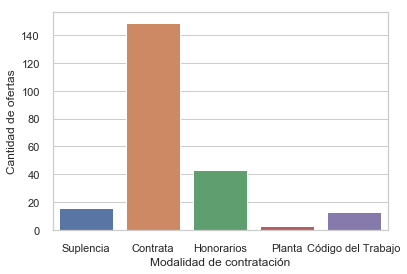

In [7]:
df_f5['Ofertas1'] = df_f5['id'].groupby(df_f5['Tipo vacante grupo']).transform('count')
sns.set(style="whitegrid")
sns.barplot(x="Tipo vacante grupo", y="Ofertas1", data=df_f5)
plt.xlabel('Modalidad de contratación')
plt.ylabel('Cantidad de ofertas')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Cantidad de ofertas')

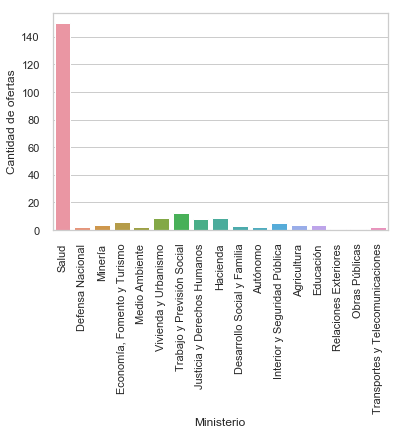

In [8]:
df_f5['Ofertas2'] = df_f5['id'].groupby(df_f5['Ministerio']).transform('count')
sns.set(style="whitegrid")
sns.barplot(x="Ministerio", y="Ofertas2", data=df_f5)
plt.xticks(rotation=90)
plt.ylabel('Cantidad de ofertas')

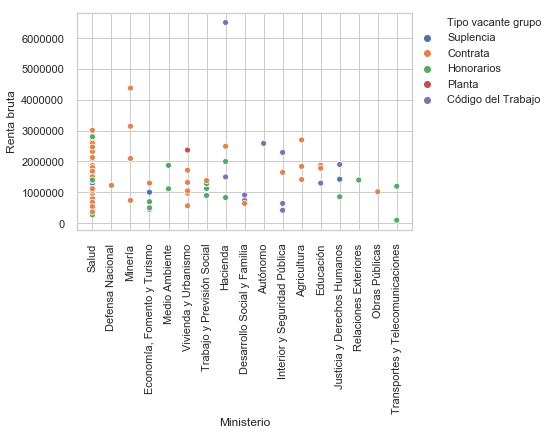

In [9]:
g = sns.scatterplot(x="Ministerio", y="Renta bruta", data=df_f5, hue='Tipo vacante grupo')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)

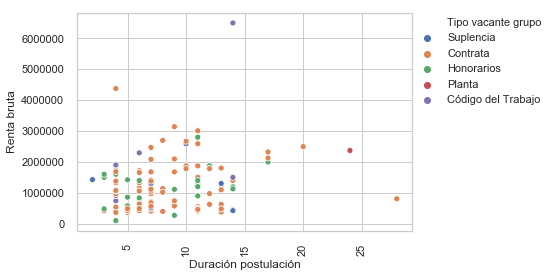

In [10]:
g = sns.scatterplot(x="Duración postulación", y="Renta bruta", data=df_f5, hue='Tipo vacante grupo')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)

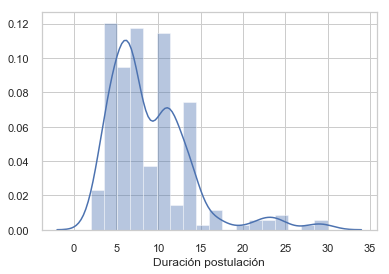

In [11]:
sns.distplot(df_f5['Duración postulación'])

In [12]:
df_f5.to_excel(r'C:\Users\user\Documents\Proyectos\Empleos Públicos\DataFiltrada.xlsx',index=False)